This jupyter notebook can be used to reproduce figure 7b, shown in [1]

[1| "Circuit-specific dendritic development in the piriform cortex"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

## System Parameter 
bl_min: minimum branch length  
bl_mean: mean branch length  
bl_max: maximum branch length  
TDBL: total dendritic branch length  

bl: range of branch length  
S: range of activated synapses

In [2]:
bl_min = 40
bl_mean = 72
bl_max = 110
bl = np.linspace(bl_min,bl_max,100)
S = np.arange(10,71,10)
TDBL = 1800

## Poisson Distribution

In [3]:
poi = lambda k,l: np.power(l,k)*np.exp(-l)/math.factorial(k)

r10 = lambda l: 1.-np.sum( [poi(k,l) for k in np.arange(0,10)] )
'''
    r10: equivalent to Eq. 1 in [1]
''';

In [4]:
Parr = []
for s in S:
    L = s * bl / TDBL
    R = np.array([r10(l) for l in L])
    '''
        R is the probability that one branch produces a dendritic spike. There are however TDBL/BL branches, 
        of which only at least one has to spike.
    '''
    P = 1-np.power(1-R,TDBL/bl)
    '''
        P is equivalent to Eq. 2 in [1]
    '''
    Parr.append(P)

## Plotting the additional response probability

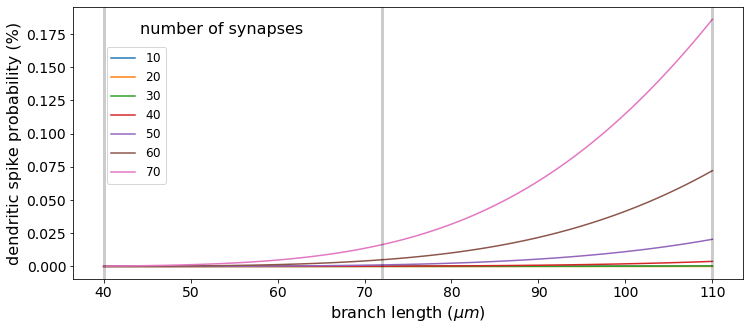

In [5]:
plt.figure(figsize=(12,5))
plt.text(0.1,0.9,'number of synapses',transform=plt.gca().transAxes,fontsize=16)

col = ['C0','C1','C2','C3','C4','C5','C6','C7','C8']
for P,c,s in zip(Parr,col,S):
    plt.plot(bl,P,c=c,label=r'${}$'.format(s))

plt.axvline(bl_min,lw=3,alpha=0.2,c='k')
plt.axvline(bl_mean,lw=3,alpha=0.2,c='k')
plt.axvline(bl_max,lw=3,alpha=0.2,c='k')
plt.xlabel(r'branch length $(\mu m)$',fontsize=16)
plt.ylabel('dendritic spike probability (%)',fontsize=16)
plt.yticks(fontsize=14)
plt.legend(loc=[0.05,0.35],fontsize=12)
plt.xticks(fontsize=14)

plt.savefig('./stim_resp.pdf',bbox_inches='tight')